# TASK-8

#####  AIRSS1237

##### Tejasvani

<br>
<h1 style = "font-size:30px; font-family:monospace ; font-weight : bold; text-align: center; border-radius: 10px 10px;">Subject : Heart Attack Analysis & Prediction </h1>
<br>

<span style="font-size:20px;color:#0026D8;font-weight : bold">Data Description: Dataset of Heart Attack</span>


- **Age** : Age of the patient
- **Sex** : Sex of the patient
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **ca**: number of major vessels (0-3)
- **cp** : Chest Pain type chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
- **trtbps** : resting blood pressure (in mm Hg)
- **chol** : cholestoral in mg/dl fetched via BMI sensor
- **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **rest_ecg** : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** : maximum heart rate achieved
- **target** : 0= less chance of heart attack 1= more chance of heart attack

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> Importing Required Libraries</h1>

In [82]:
## Import numpy, pandas

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## Import Logistic regression, Randomforest, DecisionTree and SVC

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [83]:
data=pd.read_csv("heart.csv")
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
## Check the shape of data.
data.shape

(303, 14)

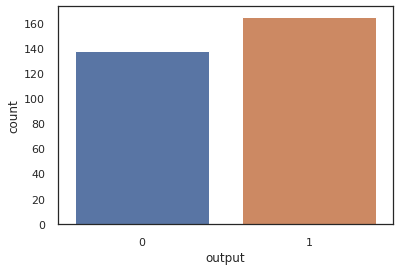

In [85]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['output'])
plt.show()

## Balancing the dataset

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Check missing values in the dataset</h1>

In [86]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Check duplicate values in the dataset</h1>

In [87]:
data.duplicated().sum()

1

In [88]:
data.drop_duplicates(inplace = True)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Correlation Matrix</h1>

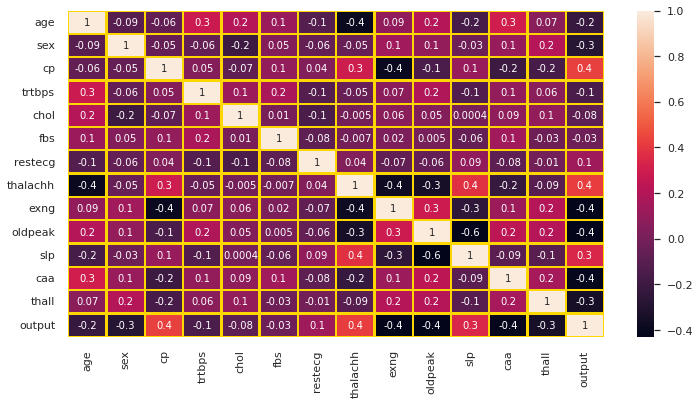

In [89]:
plt.figure(figsize =(12,6))
sns.heatmap(data.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scaling the data</h1>

In [132]:
# separate the data from the target attributes
X = data.drop(["output"],axis = 1)
y = data.output
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Splitting Dataset Into Training & Validation Set</h1>

In [133]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [134]:
X_train.shape

(201, 13)

In [135]:
X_val.shape

(101, 13)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> Algorithms</h1>

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 1.Decision Tree </h1>

In [136]:
model_1 = DecisionTreeClassifier(random_state=10)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [137]:
val_predictions = model_1.predict(X_val)
score_model1 =accuracy_score(y_val,val_predictions)
print(score_model1)

0.7029702970297029


In [138]:
report_model1=classification_report(y_val,val_predictions)
print(report_model1)

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        46
           1       0.71      0.76      0.74        55

    accuracy                           0.70       101
   macro avg       0.70      0.70      0.70       101
weighted avg       0.70      0.70      0.70       101



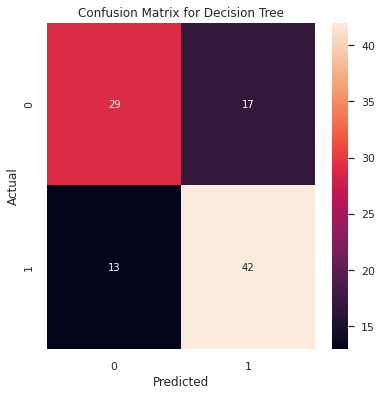

In [139]:
conf_mat1=confusion_matrix(y_val,val_predictions)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 2.Random Forest</h1>

In [140]:
model_2 = RandomForestClassifier(random_state=10)
model_2.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [141]:
val_predictions_1 = model_2.predict(X_val)
score_model2 =accuracy_score(y_val,val_predictions_1)
print(score_model2)

0.801980198019802


In [142]:
report_model2=classification_report(y_val,val_predictions_1)
print(report_model2)

              precision    recall  f1-score   support

           0       0.86      0.67      0.76        46
           1       0.77      0.91      0.83        55

    accuracy                           0.80       101
   macro avg       0.82      0.79      0.79       101
weighted avg       0.81      0.80      0.80       101



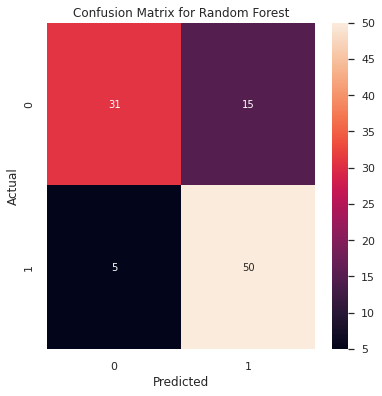

In [143]:
conf_mat2=confusion_matrix(y_val,val_predictions_1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 3.Logistic Regression</h1>

In [144]:
model_3 = LogisticRegression(random_state=10)
model_3.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [145]:
val_predictions_2 = model_3.predict(X_val)
score_model3 =accuracy_score(y_val,val_predictions_2)
print(score_model3)

0.801980198019802


In [146]:
report_model3=classification_report(y_val,val_predictions_2)
print(report_model3)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        46
           1       0.78      0.89      0.83        55

    accuracy                           0.80       101
   macro avg       0.81      0.79      0.80       101
weighted avg       0.81      0.80      0.80       101



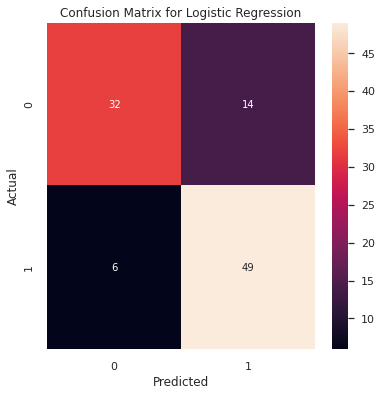

In [147]:
conf_mat3=confusion_matrix(y_val,val_predictions_2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> 4.SVM </h1>

In [148]:
model_4 = SVC(random_state=10)
model_4.fit(X_train,y_train)

SVC(random_state=10)

In [149]:
val_predictions_3 = model_4.predict(X_val)
score_model4 =accuracy_score(y_val,val_predictions_3)
print(score_model4)

0.693069306930693


In [150]:
report_model4=classification_report(y_val,val_predictions_3)
print(report_model4)

              precision    recall  f1-score   support

           0       0.74      0.50      0.60        46
           1       0.67      0.85      0.75        55

    accuracy                           0.69       101
   macro avg       0.71      0.68      0.67       101
weighted avg       0.70      0.69      0.68       101



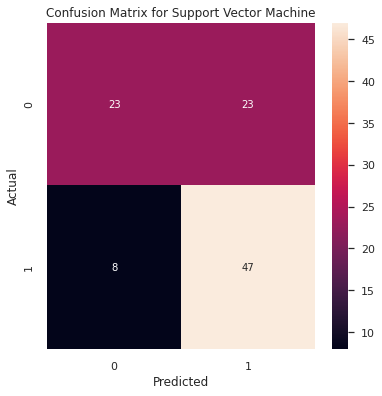

In [151]:
conf_mat4=confusion_matrix(y_val,val_predictions_3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

Text(0, 0.5, 'Algorithm Scores')

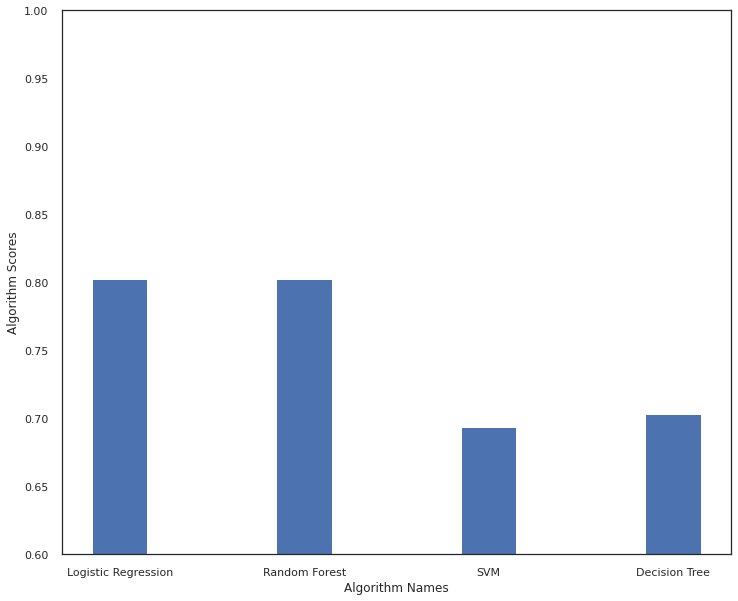

In [152]:
# Comparison Graph for used algorithms 
algo_names=['Logistic Regression','Random Forest','SVM','Decision Tree']
algo_scores=(score_model3,score_model2,score_model4,score_model1)
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names,algo_scores,width=0.3)
plt.xlabel('Algorithm Names')
plt.ylabel('Algorithm Scores')

<br>
<h1 style = "font-size:25px; font-family:monospace ; font-weight : bold; text-align: center; border-radius: 10px 10px;">Therefore,Random Forest & Logistic Regression performed better with 80% accuracy. </h1>
<br>